In [ ]:
import tensorflow as tf
import numpy as np

# 使用 NumPy 生成假数据(phony data), 总共 100 个点.
x_data = np.float32(np.random.rand(2, 100)) # 随机输入
y_data = np.dot([0.100, 0.200], x_data) + 0.300

# 构造一个线性模型
# 
b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
y = tf.matmul(W, x_data) + b

# 最小化方差
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()

# 启动图 (graph)
sess = tf.Session()
sess.run(init)

# 拟合平面
for step in range(0, 201):
    sess.run(train)
    if step % 20 == 0:
        print (step, sess.run(W), sess.run(b))
        

# MNIST 

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import argparse
import sys

FLAGS = None

def main(_):
    #import 
    mnist = input_data.read_data_sets(FLAGS.data_dir,one_hot=True)
    # create model
    x = tf.placeholder(tf.float32,[None,784])
    w = tf.Variable(tf.zeros([784,10]))
    b = tf.Variable(tf.zeros([10]))
    y = tf.matmul(x,w)+b
    # y_ and loss function
    y_=tf.placeholder(tf.float32,[None,10])
      
    cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=y))
    train_step=tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
    sess=tf.InteractiveSession()
    tf.global_variables_initializer().run()
    # train
    for _ in range(1000):
        batch_xs,batch_ys=mnist.train.next_batch(100)
        sess.run(train_step,feed_dict={x: batch_xs,y: batch_ys})
    correct_prediction=tf.equal(tf.arg_max(y,1),tf.arg_max(y_,1))
    accuracy =tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print(sess.run(accuracy,feed_dict={x:mnist.test.images,y_:mnist.test.labels}))
    
if __name__=='__main__':
    print('softmax demo')
    parser=argparse.ArgumentParser()
    parser.add_argument('--data_dir',type=str,default='/tmp/tensorflow/mnist/input_data',
                        help='Directory for string input_data')
    FLAGS ,unparsed=parser.parse_known_args()
    tf.app.run(main=main, argv=[sys.argv[0]]+unparsed)
    


In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

FLAGS = None


def main(_):
  # Import data
  mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)
  # Create the model
  x = tf.placeholder(tf.float32, [None, 784])
  W = tf.Variable(tf.zeros([784, 10]))
  b = tf.Variable(tf.zeros([10]))
  y = tf.matmul(x, W) + b

  # Define loss and optimizer
  y_ = tf.placeholder(tf.float32, [None, 10])

  # The raw formulation of cross-entropy,
  #
  #   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
  #                                 reduction_indices=[1]))
  #
  # can be numerically unstable.
  #
  # So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
  # outputs of 'y', and then average across the batch.
  cross_entropy = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
  train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

  sess = tf.InteractiveSession()
  tf.global_variables_initializer().run()
  # Train
  for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

  # Test trained model
  correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y_: mnist.test.labels}))

if __name__ == '__main__':
  parser = argparse.ArgumentParser()
  parser.add_argument('--data_dir', type=str, default='/tmp/tensorflow/mnist/input_data',
                      help='Directory for storing input data')
  FLAGS, unparsed = parser.parse_known_args()
  tf.app.run(main=main, argv=[sys.argv[0]] + unparsed)


# MNIST with TensorBoard

In [1]:
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the 'License');
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an 'AS IS' BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""A simple MNIST classifier which displays summaries in TensorBoard.

This is an unimpressive MNIST model, but it is a good example of using
tf.name_scope to make a graph legible in the TensorBoard graph explorer, and of
naming summary tags so that they are grouped meaningfully in TensorBoard.

It demonstrates the functionality of every TensorBoard dashboard.
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import os
import sys

import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

FLAGS = None


def train():
  # Import data
  mnist = input_data.read_data_sets(FLAGS.data_dir,
                                    one_hot=True,
                                    fake_data=FLAGS.fake_data)

  sess = tf.InteractiveSession()
  # Create a multilayer model.

  # Input placeholders
  with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, [None, 784], name='x-input')
    y_ = tf.placeholder(tf.float32, [None, 10], name='y-input')

  with tf.name_scope('input_reshape'):
    image_shaped_input = tf.reshape(x, [-1, 28, 28, 1])
    tf.summary.image('input', image_shaped_input, 10)

  # We can't initialize these variables to 0 - the network will get stuck.
  def weight_variable(shape):
    """Create a weight variable with appropriate initialization."""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

  def bias_variable(shape):
    """Create a bias variable with appropriate initialization."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

  def variable_summaries(var):
    """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
    with tf.name_scope('summaries'):
      mean = tf.reduce_mean(var)
      tf.summary.scalar('mean', mean)
      with tf.name_scope('stddev'):
        stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
      tf.summary.scalar('stddev', stddev)
      tf.summary.scalar('max', tf.reduce_max(var))
      tf.summary.scalar('min', tf.reduce_min(var))
      tf.summary.histogram('histogram', var)

  def nn_layer(input_tensor, input_dim, output_dim, layer_name, act=tf.nn.relu):
    """Reusable code for making a simple neural net layer.

    It does a matrix multiply, bias add, and then uses ReLU to nonlinearize.
    It also sets up name scoping so that the resultant graph is easy to read,
    and adds a number of summary ops.
    """
    # Adding a name scope ensures logical grouping of the layers in the graph.
    with tf.name_scope(layer_name):
      # This Variable will hold the state of the weights for the layer
      with tf.name_scope('weights'):
        weights = weight_variable([input_dim, output_dim])
        variable_summaries(weights)
      with tf.name_scope('biases'):
        biases = bias_variable([output_dim])
        variable_summaries(biases)
      with tf.name_scope('Wx_plus_b'):
        preactivate = tf.matmul(input_tensor, weights) + biases
        tf.summary.histogram('pre_activations', preactivate)
      activations = act(preactivate, name='activation')
      tf.summary.histogram('activations', activations)
      return activations

  hidden1 = nn_layer(x, 784, 500, 'layer1')

  with tf.name_scope('dropout'):
    keep_prob = tf.placeholder(tf.float32)
    tf.summary.scalar('dropout_keep_probability', keep_prob)
    dropped = tf.nn.dropout(hidden1, keep_prob)

  # Do not apply softmax activation yet, see below.
  y = nn_layer(dropped, 500, 10, 'layer2', act=tf.identity)

  with tf.name_scope('cross_entropy'):
    # The raw formulation of cross-entropy,
    #
    # tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.softmax(y)),
    #                               reduction_indices=[1]))
    #
    # can be numerically unstable.
    #
    # So here we use tf.nn.softmax_cross_entropy_with_logits on the
    # raw outputs of the nn_layer above, and then average across
    # the batch.
    diff = tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y)
    with tf.name_scope('total'):
      cross_entropy = tf.reduce_mean(diff)
  tf.summary.scalar('cross_entropy', cross_entropy)

  with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(FLAGS.learning_rate).minimize(
        cross_entropy)

  with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
      correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    with tf.name_scope('accuracy'):
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  tf.summary.scalar('accuracy', accuracy)

  # Merge all the summaries and write them out to
  # /tmp/tensorflow/mnist/logs/mnist_with_summaries (by default)
  merged = tf.summary.merge_all()
  train_writer = tf.summary.FileWriter(FLAGS.log_dir + '/train', sess.graph)
  test_writer = tf.summary.FileWriter(FLAGS.log_dir + '/test')
  tf.global_variables_initializer().run()

  # Train the model, and also write summaries.
  # Every 10th step, measure test-set accuracy, and write test summaries
  # All other steps, run train_step on training data, & add training summaries

  def feed_dict(train):
    """Make a TensorFlow feed_dict: maps data onto Tensor placeholders."""
    if train or FLAGS.fake_data:
      xs, ys = mnist.train.next_batch(100, fake_data=FLAGS.fake_data)
      k = FLAGS.dropout
    else:
      xs, ys = mnist.test.images, mnist.test.labels
      k = 1.0
    return {x: xs, y_: ys, keep_prob: k}

  for i in range(FLAGS.max_steps):
    if i % 10 == 0:  # Record summaries and test-set accuracy
      summary, acc = sess.run([merged, accuracy], feed_dict=feed_dict(False))
      test_writer.add_summary(summary, i)
      print('Accuracy at step %s: %s' % (i, acc))
    else:  # Record train set summaries, and train
      if i % 100 == 99:  # Record execution stats
        run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
        run_metadata = tf.RunMetadata()
        summary, _ = sess.run([merged, train_step],
                              feed_dict=feed_dict(True),
                              options=run_options,
                              run_metadata=run_metadata)
        train_writer.add_run_metadata(run_metadata, 'step%03d' % i)
        train_writer.add_summary(summary, i)
        print('Adding run metadata for', i)
      else:  # Record a summary
        summary, _ = sess.run([merged, train_step], feed_dict=feed_dict(True))
        train_writer.add_summary(summary, i)
  train_writer.close()
  test_writer.close()


def main(_):
  if tf.gfile.Exists(FLAGS.log_dir):
    tf.gfile.DeleteRecursively(FLAGS.log_dir)
  tf.gfile.MakeDirs(FLAGS.log_dir)
  train()


if __name__ == '__main__':
  parser = argparse.ArgumentParser()
  parser.add_argument('--fake_data', nargs='?', const=True, type=bool,
                      default=False,
                      help='If true, uses fake data for unit testing.')
  parser.add_argument('--max_steps', type=int, default=1000,
                      help='Number of steps to run trainer.')
  parser.add_argument('--learning_rate', type=float, default=0.001,
                      help='Initial learning rate')
  parser.add_argument('--dropout', type=float, default=0.9,
                      help='Keep probability for training dropout.')
  parser.add_argument(
      '--data_dir',
      type=str,
      default=os.path.join(os.getenv('TEST_TMPDIR', '/tmp'),
                           'tensorflow/mnist/input_data'),
      help='Directory for storing input data')
  parser.add_argument(
      '--log_dir',
      type=str,
      default=os.path.join(os.getenv('TEST_TMPDIR', '/tmp'),
                           'tensorflow/mnist/logs/mnist_with_summaries'),
      help='Summaries log directory')
  FLAGS, unparsed = parser.parse_known_args()
  tf.app.run(main=main, argv=[sys.argv[0]] + unparsed)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
Accuracy at step 0: 0.0757
Accuracy at step 10: 0.6823
Accuracy at step 20: 0.8118
Accuracy at step 30: 0.8606
Accuracy at step 40: 0.882
Accuracy at step 50: 0.8923
Accuracy at step 60: 0.8944
Accuracy at step 70: 0.9036
Accuracy at step 80: 0.903
Accuracy at step 90: 0.9066
Adding run metadata for 99
Accuracy at step 100: 0.9126
Accuracy at step 110: 0.9121
Accuracy at step 120: 0.923
Accuracy at step 130: 0.9249
Accuracy at step 140: 0.9246
Accuracy at s

SystemExit: 

/home/cadu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

"""A deep MNIST classifier using convolutional layers.

See extensive documentation at
https://www.tensorflow.org/get_started/mnist/pros
"""
# Disable linter warnings to maintain consistency with tutorial.
# pylint: disable=invalid-name
# pylint: disable=g-bad-import-order

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys
import tempfile

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

FLAGS = None


def deepnn(x):
  """deepnn builds the graph for a deep net for classifying digits.

  Args:
    x: an input tensor with the dimensions (N_examples, 784), where 784 is the
    number of pixels in a standard MNIST image.

  Returns:
    A tuple (y, keep_prob). y is a tensor of shape (N_examples, 10), with values
    equal to the logits of classifying the digit into one of 10 classes (the
    digits 0-9). keep_prob is a scalar placeholder for the probability of
    dropout.
  """
  # Reshape to use within a convolutional neural net.
  # Last dimension is for "features" - there is only one here, since images are
  # grayscale -- it would be 3 for an RGB image, 4 for RGBA, etc.
  with tf.name_scope('reshape'):
    x_image = tf.reshape(x, [-1, 28, 28, 1])

  # First convolutional layer - maps one grayscale image to 32 feature maps.
  with tf.name_scope('conv1'):
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

  # Pooling layer - downsamples by 2X.
  with tf.name_scope('pool1'):
    h_pool1 = max_pool_2x2(h_conv1)

  # Second convolutional layer -- maps 32 feature maps to 64.
  with tf.name_scope('conv2'):
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

  # Second pooling layer.
  with tf.name_scope('pool2'):
    h_pool2 = max_pool_2x2(h_conv2)

  # Fully connected layer 1 -- after 2 round of downsampling, our 28x28 image
  # is down to 7x7x64 feature maps -- maps this to 1024 features.
  with tf.name_scope('fc1'):
    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])

    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

  # Dropout - controls the complexity of the model, prevents co-adaptation of
  # features.
  with tf.name_scope('dropout'):
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

  # Map the 1024 features to 10 classes, one for each digit
  with tf.name_scope('fc2'):
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])

    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
  return y_conv, keep_prob


def conv2d(x, W):
  """conv2d returns a 2d convolution layer with full stride."""
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
  """max_pool_2x2 downsamples a feature map by 2X."""
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


def weight_variable(shape):
  """weight_variable generates a weight variable of a given shape."""
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)


def bias_variable(shape):
  """bias_variable generates a bias variable of a given shape."""
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)


def main(_):
  # Import data
  mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)

  # Create the model
  x = tf.placeholder(tf.float32, [None, 784])

  # Define loss and optimizer
  y_ = tf.placeholder(tf.float32, [None, 10])

  # Build the graph for the deep net
  y_conv, keep_prob = deepnn(x)

  with tf.name_scope('loss'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_,
                                                            logits=y_conv)
  cross_entropy = tf.reduce_mean(cross_entropy)

  with tf.name_scope('adam_optimizer'):
    train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

  with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    correct_prediction = tf.cast(correct_prediction, tf.float32)
  accuracy = tf.reduce_mean(correct_prediction)

  #graph_location = tempfile.mkdtemp()
  graph_location="/tmp/tensorboard"
  print('Saving graph to: %s' % graph_location)
  train_writer = tf.summary.FileWriter(graph_location)
  train_writer.add_graph(tf.get_default_graph())

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
      batch = mnist.train.next_batch(50)
      if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x: batch[0], y_: batch[1], keep_prob: 1.0})
        print('step %d, training accuracy %g' % (i, train_accuracy))
      train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

    print('test accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

if __name__ == '__main__':
  parser = argparse.ArgumentParser()
  parser.add_argument('--data_dir', type=str,
                      default='/tmp/tensorflow/mnist/input_data',
                      help='Directory for storing input data')
  FLAGS, unparsed = parser.parse_known_args()
  tf.app.run(main=main, argv=[sys.argv[0]] + unparsed)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
Saving graph to: /tmp/tensorboard
step 0, training accuracy 0.06
step 100, training accuracy 0.92
step 200, training accuracy 0.98
step 300, training accuracy 0.92
step 400, training accuracy 0.98
step 500, training accuracy 0.96
step 600, training accuracy 0.96
step 700, training accuracy 1
step 800, training accuracy 1
step 900, training accuracy 0.96
step 1000, training accuracy 0.98
step 1100, training accuracy 0.98
step 1200, training accuracy 0.96
ste

SystemExit: 

/home/cadu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [60]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys
import tempfile

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
def conv2d(x, W):
  """conv2d returns a 2d convolution layer with full stride."""
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
  """max_pool_2x2 downsamples a feature map by 2X."""
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


def weight_variable(shape):
  """weight_variable generates a weight variable of a given shape."""
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)


def bias_variable(shape):
  """bias_variable generates a bias variable of a given shape."""
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)
mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)

  # Create the model
x = tf.placeholder(tf.float32, [None, 784])

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
  # Build the graph for the deep net
batch=mnist.train.next_batch(10)
x=batch[0]
y_conv, keep_prob = deepnn(x)
x_image=tf.reshape(x,[-1,28,28,1])
xx=mnist.test.images
yy=mnist.test.labels
#print(batch[1])
#print(mnist)
#print(x.shape,batch[1].shape)
#print(y_conv,keep_prob)
#print(x_image.shape)
#print(666,'\n',xx,xx.shape,yy,yy.shape)
print(W_conv1,W_conv1.shape,'\n',b_conv1,b_conv1.shape,'\n',h_conv1,h_conv1.shape)

Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
<tf.Variable 'Variable_15:0' shape=(5, 5, 1, 32) dtype=float32_ref> (5, 5, 1, 32) 
 <tf.Variable 'Variable_16:0' shape=(32,) dtype=float32_ref> (32,) 
 Tensor("Relu_4:0", shape=(100, 28, 28, 32), dtype=float32) (100, 28, 28, 32)


In [19]:
print(type(tf))
print(type(conv2d))
W_conv1=weight_variable([5,5,1,32])
print(W_conv1)
print(type(mnist))

<class 'module'>
<class 'function'>
<tf.Variable 'Variable_6:0' shape=(5, 5, 1, 32) dtype=float32_ref>


NameError: name 'mnist' is not defined

## linear_regression

(100,) <class 'numpy.ndarray'> ()
<class 'numpy.ndarray'> <class 'tensorflow.python.framework.ops.Tensor'>
0.250684 0.518152
0.857314 0.487749
0.948421 0.477513
0.96217 0.475364
0.964251 0.474975
0.964567 0.474909
0.964615 0.474898
0.964622 0.474896
0.964624 0.474896
0.964624 0.474896
done


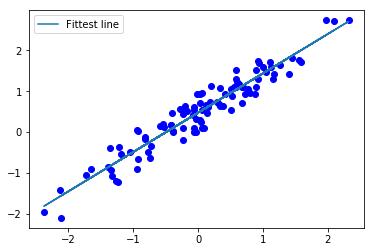

In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng=np.random
%matplotlib inline
x=[]
y=[]
vector=[]
point_num=100
for i in range(point_num):
    tempx= np.random.normal(0,1)
    tempy=tempx+np.random.rand()
    x.append(tempx)
    y.append(tempy)

vector.append([x,y])
# Vector
xx=np.array(x)
yy=np.array(y)
#print(xx,yy)
X=tf.placeholder("float")
Y=tf.placeholder("float")
W=tf.Variable(rng.rand())
print(xx.shape,type(yy),W.shape)
b=tf.Variable(rng.rand())

Y_predicted = tf.add(tf.multiply(X,W),b)
print(type(yy),type(Y_predicted))
loss=tf.reduce_sum(tf.squared_difference(Y_predicted,Y))
train=tf.train.GradientDescentOptimizer(0.001).minimize(loss)
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

for i in range(100):
    #sess.run(train)
    #for (xxx,yyy) in  zip(xx,yy):
        #sess.run(loss,feed_dict={X:xxx,Y:yyy})
    sess.run(train,feed_dict={X:xx,Y:yy})
    if i%10==0:
        print(sess.run(W),sess.run(b))
print('done')
plt.plot(x,y,'bo')
plt.plot(xx,sess.run(W)*xx+sess.run(b),label='Fittest line')
plt.legend()
plt.show()    




In [37]:
a=tf.zeros([1])
print(a)
def hello():
#hello=tf.constant("Hello world")
    return 'hello world'
demo=tf.constant(hello())
sess.run(demo)

Tensor("zeros:0", shape=(1,), dtype=float32)


b'hello world'

Epoch: 0050 cost= 0.109880067 W= 0.351105 b= 0.0712001
Epoch: 0100 cost= 0.106075771 W= 0.345068 b= 0.114633
Epoch: 0150 cost= 0.102711014 W= 0.339389 b= 0.155482
Epoch: 0200 cost= 0.099735089 W= 0.334049 b= 0.193902
Epoch: 0250 cost= 0.097103082 W= 0.329026 b= 0.230036
Epoch: 0300 cost= 0.094775237 W= 0.324302 b= 0.264022
Epoch: 0350 cost= 0.092716426 W= 0.319858 b= 0.295987
Epoch: 0400 cost= 0.090895645 W= 0.315679 b= 0.32605
Epoch: 0450 cost= 0.089285329 W= 0.311749 b= 0.354325
Epoch: 0500 cost= 0.087861218 W= 0.308052 b= 0.380919
Epoch: 0550 cost= 0.086601742 W= 0.304575 b= 0.405931
Epoch: 0600 cost= 0.085487910 W= 0.301305 b= 0.429455
Epoch: 0650 cost= 0.084502921 W= 0.29823 b= 0.451581
Epoch: 0700 cost= 0.083631851 W= 0.295337 b= 0.472391
Epoch: 0750 cost= 0.082861573 W= 0.292617 b= 0.491962
Epoch: 0800 cost= 0.082180433 W= 0.290058 b= 0.510369
Epoch: 0850 cost= 0.081578150 W= 0.287651 b= 0.527681
Epoch: 0900 cost= 0.081045501 W= 0.285388 b= 0.543965
Epoch: 0950 cost= 0.080574550

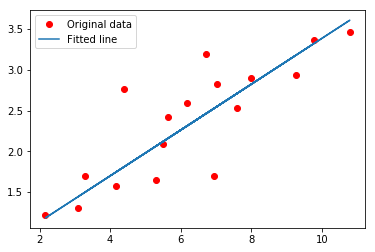

Testing... (Mean square loss Comparison)
Testing cost= 0.0763567
Absolute mean square loss difference: 0.00380141


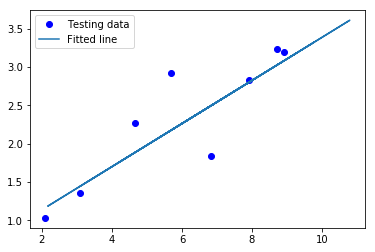

In [33]:
'''
A linear regression learning algorithm example using TensorFlow library.

Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
